In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("/content/Titanic-Dataset.csv")

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [15]:
data.duplicated().sum()

np.int64(0)

In [17]:
data.shape

(891, 12)

In [18]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Data Preprocessing


In [19]:
df=data.dropna(subset=['Embarked'])

In [20]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [21]:
df.shape

(889, 12)

Filling missing values of Age


In [22]:
df['Age'].nunique()

88

In [23]:
df['Age'].value_counts()

,count
Age,
24.00,30
22.00,27
18.00,26
28.00,25
30.00,25
...,...
24.50,1
0.67,1
0.42,1


In [24]:
df['Age'] = df.groupby(['Pclass', 'Sex'], group_keys=False)['Age'].transform(
    lambda x: x.fillna(x.rolling(window=11, min_periods=1, center=True).mean())
)

/tmp/ipython-input-100860463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df.groupby(['Pclass', 'Sex'], group_keys=False)['Age'].transform(


In [25]:
df['Age'].isnull().sum()

np.int64(0)

In [27]:
df['Age'].value_counts()

,count
Age,
24.000000,30
22.000000,28
30.000000,27
28.000000,27
19.000000,26
...,...
33.277778,1
41.500000,1
74.000000,1


Drop unnecessary columns

In [28]:
df=df.drop(columns=['PassengerId','Name','Ticket','Cabin','Ticket'])

In [29]:
df.shape

(889, 8)

In [31]:
df['Sex'].nunique()

2

In [32]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [34]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,312


In [35]:
gender_map={
    'female' : 0,
    'male' : 1
}

In [36]:
df['Gender_no']=df['Sex'].map(gender_map)
df['Gender_no'].value_counts()

,count
Gender_no,
1,577
0,312


In [37]:
df['Sex'] = data['Sex'].map({'male':0, 'female':1})

In [38]:
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age','Fare']] = scaler.fit_transform(data[['Age','Fare']])

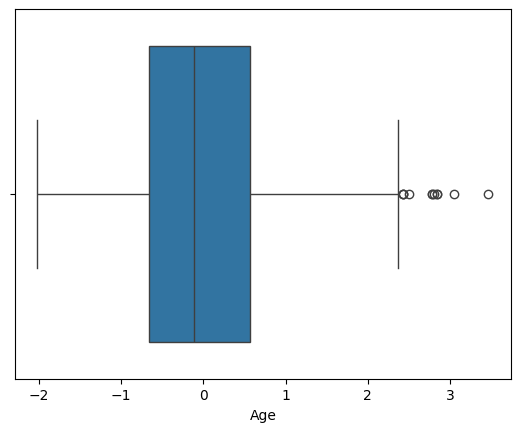

In [40]:
sns.boxplot(x=data['Age'])
plt.show()

In [41]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

data = data[(data['Age'] >= lower) & (data['Age'] <= upper)]

In [43]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Gender_no'],
      dtype='object')

/tmp/ipython-input-3429000340.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set2')


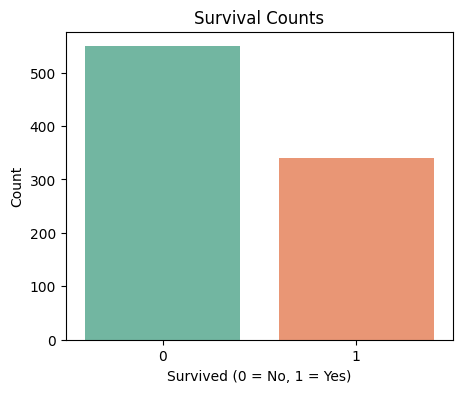

Survived
0    61.754781
1    38.245219
Name: proportion, dtype: float64


In [44]:
plt.figure(figsize=(5,4))
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title("Survival Counts")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

print(df['Survived'].value_counts(normalize=True) * 100)

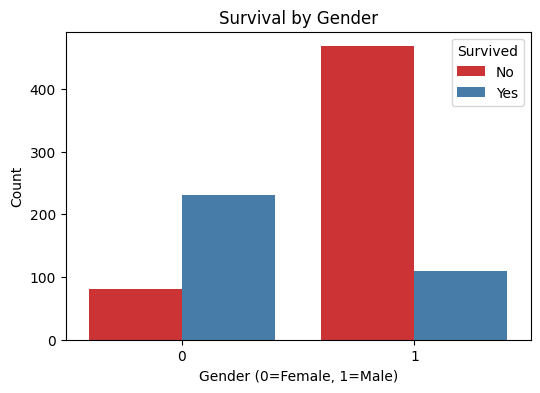

Gender_no
0    74.038462
1    18.890815
Name: Survived, dtype: float64


In [45]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender_no', hue='Survived', data=df, palette='Set1')
plt.title("Survival by Gender")
plt.xlabel("Gender (0=Female, 1=Male)")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()

# Percent survival by gender
print(df.groupby('Gender_no')['Survived'].mean()*100)


In [46]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex  Survived
0    0           468
     1           109
1    0            81
     1           231
Name: Survived, dtype: int64

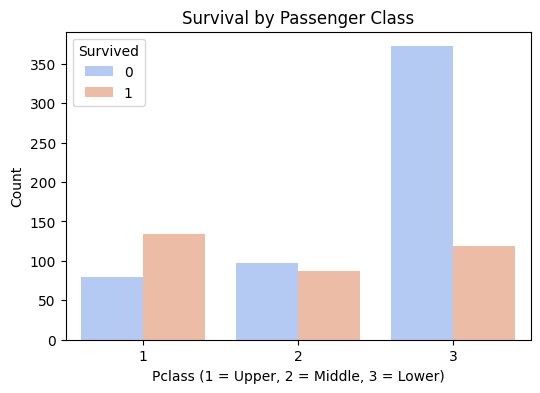

Pclass
1    62.616822
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [47]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='coolwarm')
plt.title("Survival by Passenger Class")
plt.xlabel("Pclass (1 = Upper, 2 = Middle, 3 = Lower)")
plt.ylabel("Count")
plt.show()

# Survival rate by Pclass
print(df.groupby('Pclass')['Survived'].mean()*100)

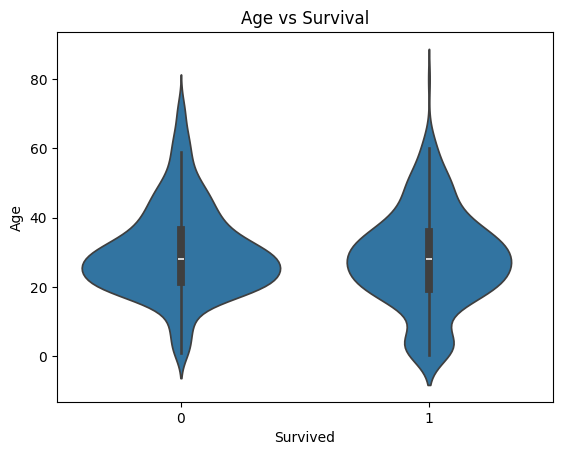

In [48]:
sns.violinplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()